In [ ]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility
from sklearn.neural_network import MLPClassifier

from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting
import seaborn as sns

# Start by defining three helper functions:
# - one to plot the sample distribution  acorss the class labels (to see how un-/balanced the dataset is)
# - one to compute and plot the confusion matrix
# - one to plot data in 2D with different colors per class label

def plot_pie(y, labels, title=""):
    target_stats = Counter(y)
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.set_title(title + " (size: %d)" % len(y))
    ax.pie(sizes, explode=explode, labels=target_stats.keys(), shadow=True, autopct='%1.1f%%')
    ax.axis('equal')


def compute_and_plot_cm(ytest, ypred, labels, title=""):
    global nfigure
    # Compute confusion matrix
    cm = metrics.confusion_matrix(ytest, ypred)
    
    accuracy = metrics.accuracy_score(ytest, ypred, normalize=True)

    # Normalize the matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    # Plot the confusion matrix

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # plot the confusionmatrix using blue shaded colors
    plt.title("Confusion Matrix Normalized (%s) Accuracy: %.1f%%" % (title, accuracy*100)) # add title
    plt.colorbar() # plot the color bar as legend

    # Plot the x and y ticks using the class label names
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)


def plot_2d(xpred, ypred, labels, title=""):
    global nfigure
    # define the colors to use for each class label
    colors = ['red', 'blue', 'green', 'yellow', 'black']
    len_colors = len(colors)
    if len_colors < len(labels):
        print("WARNING: we have less colors than classes: some classes will reuse the same color")

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.title("Feature Space (%s)" % title) # add title


    # plot each class label with a separate color 
    for c in [4,5]:
        cur_class = (ypred == c) # get all points belonging to class c
        plt.plot(xpred[cur_class, 0], xpred[cur_class, 1], 'o', color=colors[c % len_colors]) # plot class c


nfigure = 0 #used to number the figures

In [ ]:
#pip install imbalanced-learn

# 1. Loading the data

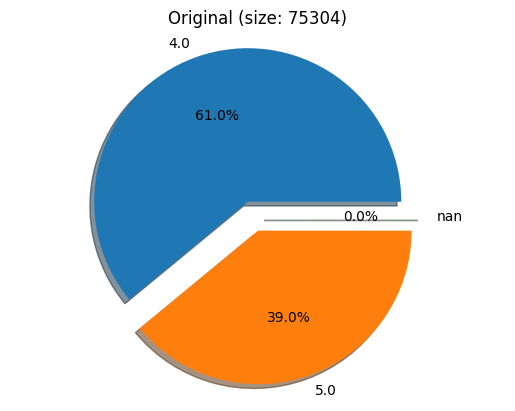

In [3]:
################ Load data ####################
# Get the dataset loaded and define class labels 
data = pd.read_csv(r'jobs.csv', header=None)
data_class_labels = ["successful", "unsuccessful"]

# All data columns except last are input features (X), last column is output label (y)
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]

X = X[y != 2]
y = y[y != 2]

X = X[y != 3]
y = y[y != 3]

plot_pie(y, data_class_labels, "Original")

In [4]:
# Set column names to cloumn indexes
X.columns = list(range(X.shape[1]))
#print(X)

In [6]:
# Remove nan values
y.dropna(inplace = True)
X.dropna(inplace = True)

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75303 entries, 0 to 76392
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       75303 non-null  float64
 1   1       75303 non-null  float64
 2   2       75303 non-null  float64
 3   3       75303 non-null  float64
 4   4       75303 non-null  float64
 5   5       75303 non-null  float64
 6   6       75303 non-null  float64
 7   7       75303 non-null  float64
 8   8       75303 non-null  float64
 9   9       75303 non-null  float64
 10  10      75303 non-null  float64
 11  11      75303 non-null  float64
 12  12      75303 non-null  float64
 13  13      75303 non-null  float64
 14  14      75303 non-null  float64
 15  15      75303 non-null  float64
 16  16      75303 non-null  float64
 17  17      75303 non-null  float64
 18  18      75303 non-null  float64
 19  19      75303 non-null  float64
 20  20      75303 non-null  float64
 21  21      75303 non-null  float64
 22

### What problem do you see? 


### Lets make the data balance: over_sampling.SMOTE

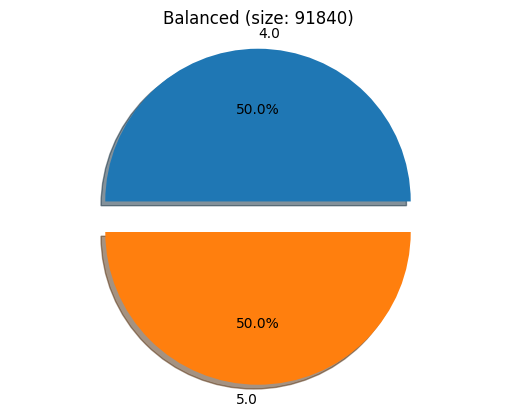

In [7]:
################ Resample data #################

# Google data is very skewed, try to balance the dataset
sm = over_sampling.SMOTE(random_state=42, sampling_strategy="auto")
X, y = sm.fit_resample(X,y)

# Plot the balanced label distribution
plot_pie(y,data_class_labels, "Balanced")

### Lets have a smaller number of samples:  utils.resample()

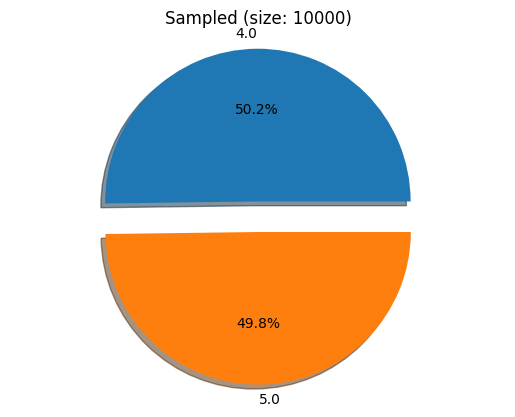

In [8]:
# Resample the data with simple random resampling (if too big)
# - replace decideds if sampling with or without replacement
# - n_samples decide the size of the ouput: if set to None ouput = input (i.e. no resampling)
X, y = utils.resample(X,y, replace=False, n_samples=10000)

# Plot the resampled label distribution

plot_pie(y,data_class_labels, "Sampled")

# 2. Preparing the data

In [9]:
################ Split data ####################
# Split data in training and testing for 0.33 ratio of testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.33, random_state=42)

### Standardize the data

In [10]:
################ Scale data ####################
# Train a scaler to standardize the features (zero mean and unit variance)
scaler = preprocessing.StandardScaler().fit(X)

# ... and scale the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Finding the k principle components (Bonus)

3 features make up at least 90% of the variance description



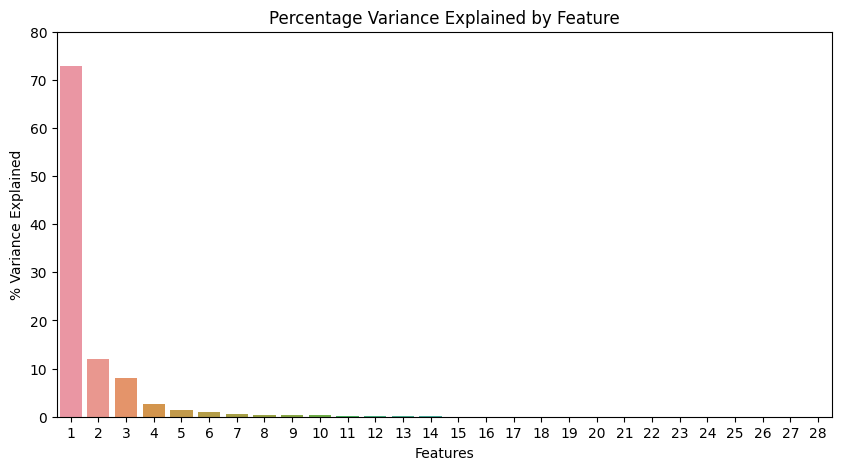

In [11]:
################ PCA ####################
# Train a PCA with k dimensions: Write a script to find minimum number of k components that ...
# contain 90% of variance description

# Find minimum number of components
pca_all_components = decomposition.PCA()
_ = pca_all_components.fit(X)
components = np.arange(pca_all_components.n_components_) + 1


fig, ax = plt.subplots(figsize=(10, 5))
_ = sns.barplot(x=components, y=100*pca_all_components.explained_variance_ratio_)

sum = 0.0
k = 0
while sum < 0.9:
  sum = sum + pca_all_components.explained_variance_ratio_[k]
  k = k+1

print(k,"features make up at least 90% of the variance description\n")
plt.title('Percentage Variance Explained by Feature')
plt.xlabel('Features')
plt.ylabel('% Variance Explained')
plt.ylim(0, 80)
plt.show()


#Reduce dimensionality
pca = decomposition.PCA(n_components=k).fit(X)

# ... and apply it to the features
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


# 3. Logistic Regression

In [14]:
def best_estimator(model1, model2, model3):
  best_score = 0
  best_est = []
  for i in [model1, model2, model3]:
    if i.best_score_ > best_score:
      best_score = i.best_score_ 
      best_est = i
  return best_est

Acuracy of LR : 79.8%
[[0.86969697 0.13030303]
 [0.27272727 0.72727273]]


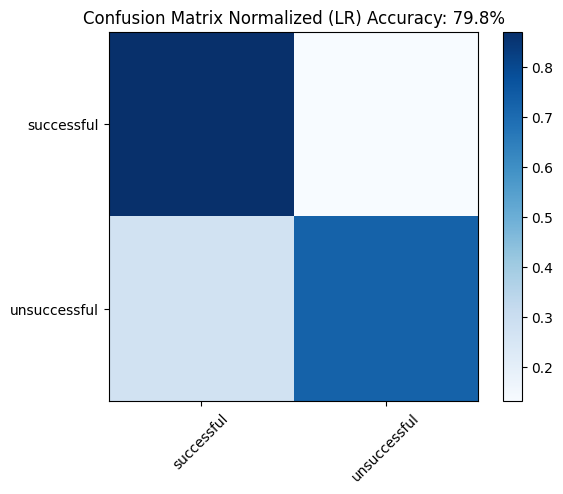

In [12]:
################ Logit ##################
# Train a Logit model on the original features
lr = linear_model.LogisticRegression().fit(X_train_scaled,y_train)

# Compute the predicted labels on test data
y_lr = lr.predict(X_test_scaled)

# Display results
print("Acuracy of LR : %.1f%%" % (metrics.accuracy_score(y_test,y_lr)*100)) #accuracy
compute_and_plot_cm(y_test, y_lr, data_class_labels, title="LR")            #confusion matrix

In [16]:
# hyper parameter tuning
lr_parameters1 = {'solver':('newton-cg', 'lbfgs','sag','saga'),
                 'penalty':('l2','none'),
                  'C':[15, 20, 45]} #'C':[0.1, 1, 10]}

lr_parameters2 = {'solver':(['liblinear']),
                 'penalty':('l1','l2'),
                  'C':[15, 20, 45]} #'C':[0.1, 1, 10]}


lr_parameters3 = {'solver':(['saga']),
                 'penalty':('l1','elasticnet'),
                  'C':[15, 20, 45]} #'C':[0.1, 1, 10]}

# model fitting on combinations of hyper parameters
gridS_lr_1 = model_selection.GridSearchCV(lr, lr_parameters1)
gridS_lr_1.fit(X_train_scaled,y_train)

gridS_lr_2 = model_selection.GridSearchCV(lr, lr_parameters2)
gridS_lr_2.fit(X_train_scaled,y_train)

gridS_lr_3 = model_selection.GridSearchCV(lr, lr_parameters3)
gridS_lr_3.fit(X_train_scaled,y_train)

# find best hyper parameter configuration
best_est = best_estimator(gridS_lr_1, gridS_lr_2, gridS_lr_3)
print("----- Best Hyper-parameters LR-----")
print("Score  : ",best_est.best_score_)
print("Setting: ",best_est.best_estimator_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ di

----- Best Hyper-parameters LR-----
Score  :  0.8346268656716418
Setting:  LogisticRegression(C=15, penalty='none', solver='newton-cg')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Apply LR on PCA components (Bonus)

Acuracy of LR + PCA: 50.0%
[[1. 0.]
 [1. 0.]]


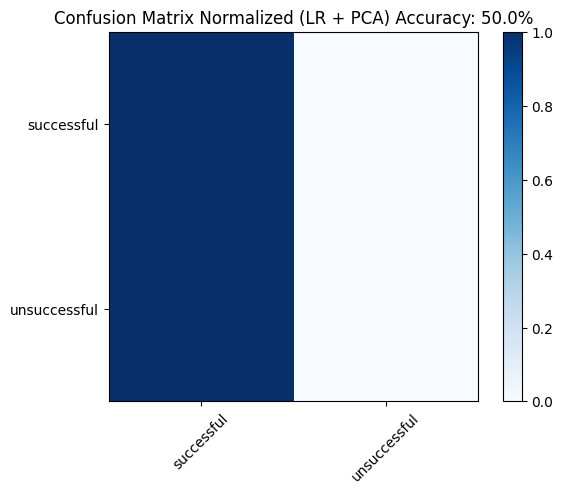

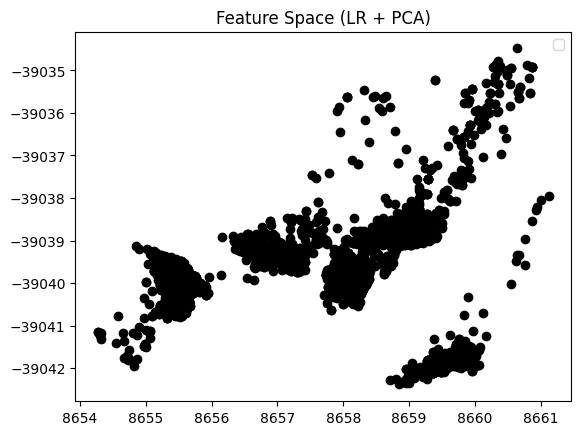

In [17]:
# Train a Logit model on pca extracted features
lr_pca = linear_model.LogisticRegression().fit(X_train_scaled_pca,y_train)

# Compute the predicted labels on test data
y_lr_pca = lr_pca.predict(X_test_scaled_pca)

# Display results
print("Acuracy of LR + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lr_pca)*100))
compute_and_plot_cm(y_test, y_lr_pca, data_class_labels,title="LR + PCA") #confusion matrix
plot_2d(X_test_scaled_pca, y_lr_pca, data_class_labels, title="LR + PCA") #scatter plot of classes


In [18]:

# hyper parameter tuning
gridS_lr_pca_1 = model_selection.GridSearchCV(lr_pca, lr_parameters1)
gridS_lr_pca_1.fit(X_train_scaled_pca,y_train)

gridS_lr_pca_2 = model_selection.GridSearchCV(lr_pca, lr_parameters2)
gridS_lr_pca_2.fit(X_train_scaled_pca,y_train)

gridS_lr_pca_3 = model_selection.GridSearchCV(lr_pca, lr_parameters3)
gridS_lr_pca_3.fit(X_train_scaled_pca,y_train)

# Find best parameter configuration
best_est = best_estimator(gridS_lr_pca_1, gridS_lr_pca_2, gridS_lr_pca_3)
print("----- Best Hyper-parameters LR + PCA-----")
print("Score  : ",best_est.best_score_)
print("Setting: ",best_est.best_estimator_)


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_l

----- Best Hyper-parameters LR + PCA-----
Score  :  0.5780597014925373
Setting:  LogisticRegression(C=15, solver='newton-cg')


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_

# 4. Apply Support Vector Machine

Acuracy of SVM : 89.2%
[[0.89454545 0.10545455]
 [0.11151515 0.88848485]]
Acuracy of SVM + PCA : 50.0%
[[1. 0.]
 [1. 0.]]


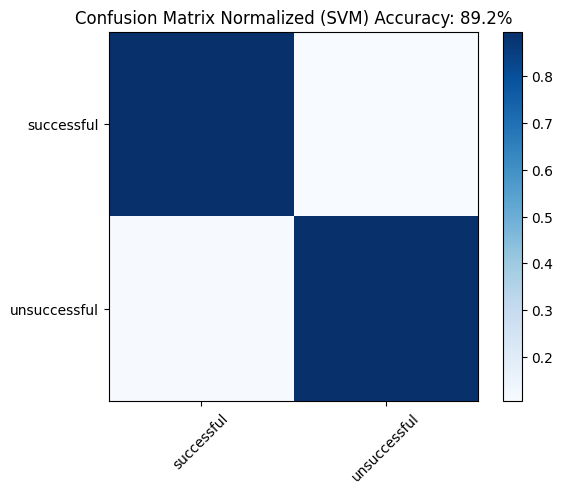

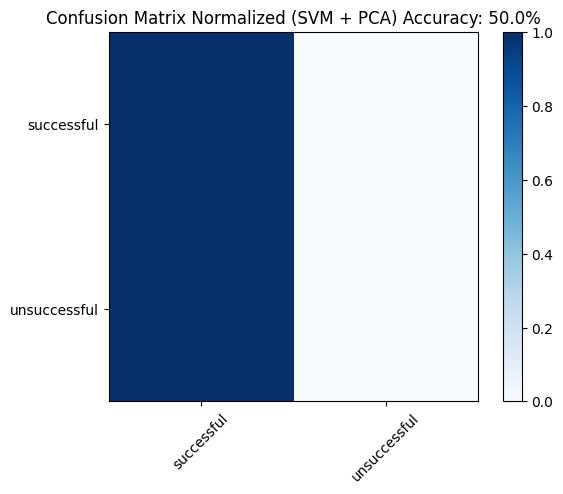

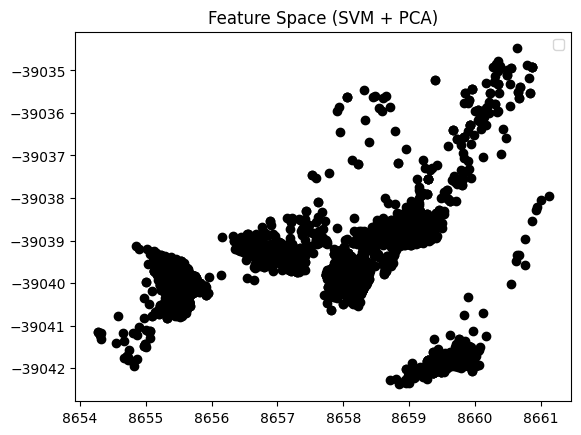

In [19]:
################ SVM ##################
# Train a SVM model on the original features
sv = svm.SVC().fit(X_train_scaled,y_train)

# Compute the predicted labels on test data
y_sv = sv.predict(X_test_scaled)
print("Acuracy of SVM : %.1f%%" % (metrics.accuracy_score(y_test,y_sv)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_sv, data_class_labels,title="SVM")


# Train a SVM model on PCA extracted features
sv_pca = svm.SVC().fit(X_train_scaled_pca,y_train)

# Compute the predicted labels on test data
y_sv_pca = sv_pca.predict(X_test_scaled_pca)
print("Acuracy of SVM + PCA : %.1f%%" % (metrics.accuracy_score(y_test,y_sv_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_sv_pca, data_class_labels, title="SVM + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_sv_pca, data_class_labels, title="SVM + PCA")


In [20]:
# hyper parameter tuning
sv_parameters = {'kernel':('linear','poly','rbf','sigmoid'),
                 'gamma':('scale', 'auto'),
                 'C':[10, 15,20,45]}#'C':[0.1, 1, 10]}


gridS_sv = model_selection.GridSearchCV(sv, sv_parameters)
gridS_sv.fit(X_train_scaled,y_train)

print("----- Best Hyper-parameters SVM -----")
print("Score  : ",gridS_sv.best_score_)
print("Setting: ",gridS_sv.best_estimator_)


----- Best Hyper-parameters SVM -----
Score  :  0.9119402985074627
Setting:  SVC(C=20)


'\ngridS_sv_pca = model_selection.GridSearchCV(sv_pca, sv_parameters)\ngridS_sv_pca.fit(X_train_scaled_pca,y_train)\n\nprint("----- Best Hyper-parameters SVM + PCA-----")\nprint("Score  : ",gridS_sv_pca.best_score_)\nprint("Setting: ",gridS_sv_pca.best_estimator_)\n'

In [ ]:
gridS_sv_pca = model_selection.GridSearchCV(sv_pca, sv_parameters)
gridS_sv_pca.fit(X_train_scaled_pca,y_train)

print("----- Best Hyper-parameters SVM + PCA-----")
print("Score  : ",gridS_sv_pca.best_score_)
print("Setting: ",gridS_sv_pca.best_estimator_)

# 5. Apply Decision Tree

In [ ]:
################ DecisionTree ##################
# Train a DT model on the original features
dt = tree.DecisionTreeClassifier().fit(X_train_scaled,y_train)

# Compute the predicted labels on test data
y_dt = dt.predict(X_test_scaled)
print("Acuracy of DT : %.1f%%" % (metrics.accuracy_score(y_test,y_dt)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_dt, data_class_labels, title="DT")

# Train a DT model on PCA extracted features
dt_pca = tree.DecisionTreeClassifier().fit(X_train_scaled_pca,y_train)


# Compute the predicted labels on test data
y_dt_pca = dt_pca.predict(X_test_scaled_pca)

print("Acuracy of DT + PCA : %.1f%%" % (metrics.accuracy_score(y_test,y_dt_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_dt_pca, data_class_labels, title="DT + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_dt_pca, data_class_labels, title="DT + PCA")




# 6. Apply Random Forest

In [ ]:
################ RandomForest ##################
# Train a RF model on the original features
rf = ensemble.RandomForestClassifier().fit(X_train_scaled,y_train)

# Compute the predicted labels on test data
y_rf = rf.predict(X_test_scaled)
print("Acuracy of RF : %.1f%%" % (metrics.accuracy_score(y_test,y_rf)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_rf, data_class_labels,title="RF")

# Train a Logit model on PDA extracted features
rf_pca = ensemble.RandomForestClassifier().fit(X_train_scaled_pca,y_train)

# Compute the predicted labels on test data
y_rf_pca = rf_pca.predict(X_test_scaled_pca)
print("Acuracy of RF + PCA : %.1f%%" % (metrics.accuracy_score(y_test,y_rf_pca)*100))

# Show confusion matrix
compute_and_plot_cm(y_test, y_rf_pca, data_class_labels, title="RF + PCA")

# Show data in 2D
plot_2d(X_test_scaled_pca, y_rf_pca, data_class_labels, title="RF + PCA")

In [ ]:
# hyper parameter tuning
rf_parameters = {'bootstrap':('True', 'False'),
                 'max_depth':[10, 50, 100],
                 'max_features':('sqrt','log2','None'),
                 'min_samples_leaf': [0.5, 1, 3],
                 'min_samples_split': [1.5, 2, 6],
                 'n_estimators': [50, 100, 200]
                 }


gridS_rf = model_selection.GridSearchCV(rf, rf_parameters)
_ = gridS_rf.fit(X_train_scaled,y_train)

print("----- Best Hyper-parameters RF -----")
print("Score  : ",gridS_rf.best_score_)
print("Setting: ",gridS_rf.best_estimator_)

In [ ]:
gridS_rf_pca = model_selection.GridSearchCV(rf_pca, rf_parameters)
gridS_rf_pca.fit(X_train_scaled_pca,y_train)

print("----- Best Hyper-parameters RF + PCA-----")
print("Score  : ",gridS_rf_pca.best_score_)
print("Setting: ",gridS_rf_pca.best_estimator_)

In [ ]:
# Feature importance
importances =  rf.feature_importances_
_sorted_indices = np.argsort(importances)[::-1]   # Sort the feature importance in descending order

importances = importances[_sorted_indices]
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(range(X_train_scaled.shape[1])), y=importances)
sns.lineplot(x=list(range(X_train_scaled.shape[1])), 
             y=np.mean(importances)*np.ones(X_train_scaled.shape[1]),
             linestyle='--', color='black')

print("Feature Importances\n")
plt.title('Feature Importances')
plt.xlabel('Features Column Index')
plt.xticks(range(X_train_scaled.shape[1]), X.columns[_sorted_indices])
plt.ylabel('Importance')
plt.ylim(0, 0.25)
plt.show()


# 7. Multi-Layer Perceptron (MLP)

In [ ]:
################ Multi-Layer Perceptron ##################
# Train an MLP model on the original features
mlp = MLPClassifier ()
ml = mlp.fit(X_train_scaled,y_train)

# Compute the predicted labels on test data
y_mlp = ml.predict(X_test_scaled)

#print the accuracy
print("Acuracy of MLP : %.1f%%" % (metrics.accuracy_score(y_test,y_mlp)*100))

# print the prediction probability for each class
compute_and_plot_cm(y_test, y_mlp, data_class_labels,title='MLP')

In [ ]:
# hyper parameter tuning
mlp_parameters = {'hidden_layer_sizes':[50,100,200] ,
                  'activation': ('identity','logistic','tanh','relu'),
                  'solver': ('lbfgs','sgd','adam'),
                  'learning_rate':('constant','invscaling','adaptive')
                 }


gridS_mlp = model_selection.GridSearchCV(ml, mlp_parameters)
_ = gridS_mlp.fit(X_train_scaled,y_train)

print("----- Best Hyper-parameters mlp -----")
print("Score  : ",gridS_mlp.best_score_)
print("Setting: ",gridS_mlp.best_estimator_)

# ANOVA Analysis Experiments


In [ ]:
# Function to find test accuracy for each experiment where the hyperparameters of RF are varied
def accuracy_predictions (reps, Xtrain, Xtest, ytrain, ytest):
  accuracy_dataset = [{} for r in range(reps*27)]
  rf_parameter = {'max_depth':[10, 50, 100],
                  'max_features':['sqrt','log2','auto'],
                  'n_estimators': [50, 100, 200]}

  count = 0
  # for each max depth                
  for d in rf_parameter['max_depth']:
    for f in rf_parameter['max_features']:
      for e in rf_parameter['n_estimators']:
        #for each repetition
        for r in range(reps): 
          #train classifier 
          rf = ensemble.RandomForestClassifier(max_depth=d, max_features=f, n_estimators=e).fit(Xtrain,ytrain)

          # Prediction
          predictions = rf.predict(Xtest)

          # Calculate Accuracy, Precision and Recall Metrics
          accuracy_dataset[count] = metrics.accuracy_score(predictions, ytest)
          count = count + 1
  return accuracy_dataset

In [ ]:
# Repetitions of each experiment
repetitions = 3 
        
# Predictions For Datasets
accuracy_rf = accuracy_predictions(repetitions,X_train_scaled, X_test_scaled, y_train, y_test)
print(accuracy_rf)
